In [145]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os

In [146]:
dataset = pd.read_csv('data.csv')
dataset.head(5)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [147]:
dataset = dataset.iloc[:, 1:12]
dataset.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [148]:
#see the amount of each category
dataset.groupby('diagnosis').count()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,,,,,,,,,,
B,357,357,357,357,357,357,357,357,357,357
M,212,212,212,212,212,212,212,212,212,212


In [149]:
#even the amount of each category
mal_df = dataset.loc[dataset['diagnosis']== 'M', :]
benign_df = dataset.loc[dataset['diagnosis']== 'B', :]
reduced_benign = benign_df.sample(n=212, random_state = 42)

normal_df = pd.concat([reduced_benign, mal_df])
normal_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
395,B,14.060,17.18,89.75,609.1,0.08045,0.05361,0.026810,0.03251,0.1641,0.05764
110,B,9.777,16.99,62.50,290.2,0.10370,0.08404,0.043340,0.01778,0.1584,0.07065
481,B,13.900,19.24,88.73,602.9,0.07991,0.05326,0.029950,0.02070,0.1579,0.05594
493,B,12.460,12.83,78.83,477.3,0.07372,0.04043,0.007173,0.01149,0.1613,0.06013
136,B,11.710,16.67,74.72,423.6,0.10510,0.06095,0.035920,0.02600,0.1339,0.05945
...,...,...,...,...,...,...,...,...,...,...,...
563,M,20.920,25.09,143.00,1347.0,0.10990,0.22360,0.317400,0.14740,0.2149,0.06879
564,M,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.243900,0.13890,0.1726,0.05623
565,M,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.144000,0.09791,0.1752,0.05533
566,M,16.600,28.08,108.30,858.1,0.08455,0.10230,0.092510,0.05302,0.1590,0.05648


In [150]:
normal_df =normal_df.drop(columns =['concavity_mean', 'concave points_mean', 'fractal_dimension_mean'])
normal_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,symmetry_mean
395,B,14.060,17.18,89.75,609.1,0.08045,0.05361,0.1641
110,B,9.777,16.99,62.50,290.2,0.10370,0.08404,0.1584
481,B,13.900,19.24,88.73,602.9,0.07991,0.05326,0.1579
493,B,12.460,12.83,78.83,477.3,0.07372,0.04043,0.1613
136,B,11.710,16.67,74.72,423.6,0.10510,0.06095,0.1339
...,...,...,...,...,...,...,...,...
563,M,20.920,25.09,143.00,1347.0,0.10990,0.22360,0.2149
564,M,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.1726
565,M,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.1752
566,M,16.600,28.08,108.30,858.1,0.08455,0.10230,0.1590


In [151]:
X = normal_df.drop('diagnosis', axis=1)
feature_names = X.columns
X.head()
y= normal_df['diagnosis']
target_names = ['benign', 'malignant']

In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [153]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')


In [154]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [155]:
# Fit the model using the grid search estimator. 
# This will take the SVC model and try each combination of parameters
grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... C=1, gamma=0.0001, score=0.882, total=   0.2s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.868, total=   0.2s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.897, total=   0.1s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.941, total=   0.5s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.925, total=   0.3s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.882, total=   0.3s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.868, total=   0.2s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.897, total=   0.2s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.941, total=   0.5s
[CV] C=1, gamma=0.001 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   24.6s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [156]:
# List the best parameters for this dataset
print(grid.best_params_)

{'C': 10, 'gamma': 0.0001}


In [157]:
# List the best score
print(grid.best_score_)

0.9145302897278315


In [158]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test)

In [159]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

      benign       0.89      1.00      0.94        48
   malignant       1.00      0.84      0.91        37

    accuracy                           0.93        85
   macro avg       0.94      0.92      0.93        85
weighted avg       0.94      0.93      0.93        85



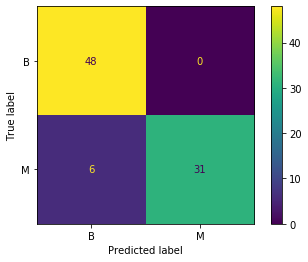

In [160]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(grid, X_test, y_test) 
plt.show()  